Name : Siya Gampawar
Roll no. : D-15

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
RESHAPED  = 784

x_test = x_test.reshape(10000,RESHAPED)
x_train = x_train.reshape(60000,RESHAPED)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /=255

print(x_train.shape,'train samples')
print(x_test.shape,'test samples')

y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

(60000, 784) train samples
(10000, 784) test samples


Model 0 : Single layer Perceptron without Hidden layers

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()

In [ ]:
model_0.add(Dense(10,input_shape = (784,),name='dense_layer_1',activation = 'softmax'))

In [ ]:
model_0.compile(optimizer = 'SGD',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
training = model_0.fit(x_train,y_train,batch_size = 64,epochs = 100,validation_split = 0.2)

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0341 - accuracy: 0.6764 - val_loss: 0.7600 - val_accuracy: 0.7604
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.7078 - accuracy: 0.7742 - val_loss: 0.6565 - val_accuracy: 0.7906
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6344 - accuracy: 0.7970 - val_loss: 0.6079 - val_accuracy: 0.8046
Epoch 4/100
750/750 [==============================] - 3s 4ms/step - loss: 0.5947 - accuracy: 0.8090 - val_loss: 0.5773 - val_accuracy: 0.8115
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5685 - accuracy: 0.8167 - val_loss: 0.5576 - val_accuracy: 0.8161
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5497 - accuracy: 0.8219 - val_loss: 0.5429 - val_accuracy: 0.8201
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5352 - accuracy: 0.8270 - val_loss: 0.5317 - val_accuracy: 0.8225

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


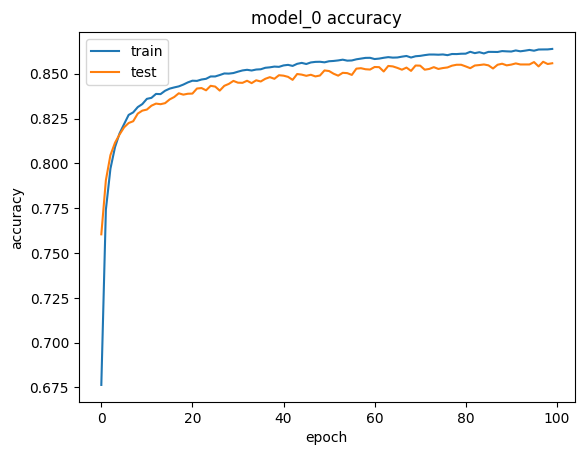

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model_0 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

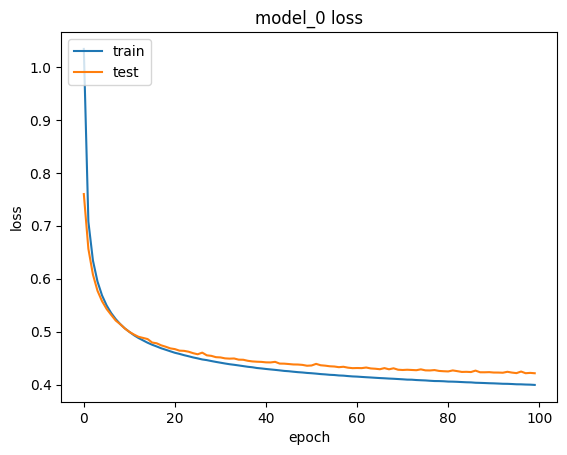

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model_0 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc = model_0.evaluate(x_test,y_test)
print("Test Accuracy model_0: ",test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.8419
Test Accuracy model_0:  0.8418999910354614


In [ ]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 1 : Adding Hidden Layer

In [ ]:
model_1 = Sequential()

In [ ]:
model_1.add(Dense(128,input_shape = (784,),name='dense_layer_1',activation = 'relu'))
model_1.add(Dense(10,name = 'dense_layer_2',activation = 'softmax'))

In [ ]:
model_1.compile(optimizer = 'SGD',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
training_1 = model_1.fit(x_train,y_train,batch_size = 64,epochs = 100,validation_split = 0.2)

Epoch 1/100
750/750 [==============================] - 3s 4ms/step - loss: 0.9151 - accuracy: 0.7132 - val_loss: 0.6586 - val_accuracy: 0.7847
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6102 - accuracy: 0.7980 - val_loss: 0.5926 - val_accuracy: 0.7951
Epoch 3/100
750/750 [==============================] - 3s 4ms/step - loss: 0.5460 - accuracy: 0.8173 - val_loss: 0.5290 - val_accuracy: 0.8190
Epoch 4/100
750/750 [==============================] - 3s 4ms/step - loss: 0.5125 - accuracy: 0.8265 - val_loss: 0.5041 - val_accuracy: 0.8270
Epoch 5/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4895 - accuracy: 0.8340 - val_loss: 0.4851 - val_accuracy: 0.8303
Epoch 6/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4733 - accuracy: 0.8380 - val_loss: 0.4720 - val_accuracy: 0.8342
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4606 - accuracy: 0.8432 - val_loss: 0.4620 - val_accuracy: 0.8350

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


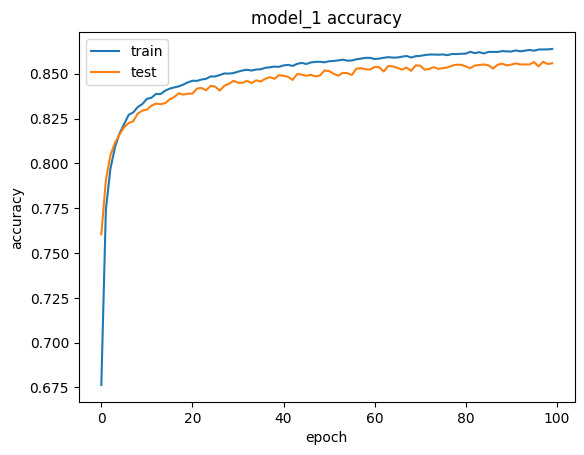

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model_1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

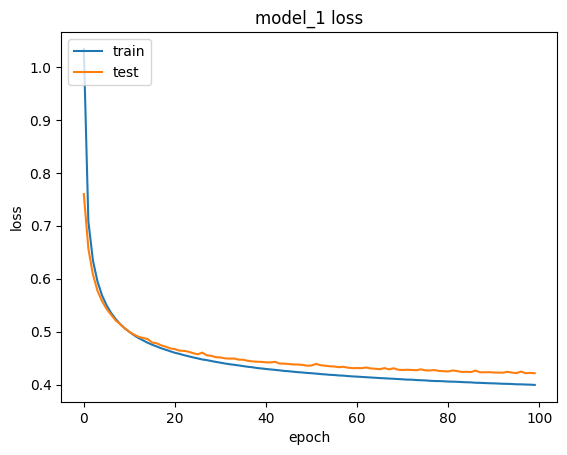

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc = model_1.evaluate(x_test,y_test)
print("Test Accuracy model_1: ",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.8766
Test Accuracy model_1:  0.8766000270843506


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 128)               100480    
                                                                 
 dense_layer_2 (Dense)       (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 2 : Adding More Hidden Layers

In [ ]:
from tensorflow.keras.layers import Dropout
model_2 = tf.keras.Sequential()
N_hidden = 512

model_2.add(Dense(N_hidden,name = 'dense_layer_11',input_shape = (784,),activation = 'relu'))
model_2.add(Dense(256,name = 'dense_layer_22',activation = 'relu'))
model_2.add(Dense(128,name = 'dense_layer_33',activation = 'relu'))
model_2.add(Dense(64,name = 'dense_layer_44',activation = 'relu'))
model_2.add(Dense(10,name = 'dense_layer_55',activation = 'softmax'))


In [ ]:
model_2.compile(optimizer = 'SGD',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
training_2 = model_2.fit(x_train,y_train,batch_size = 64,epochs = 100,validation_split = 0.2)

Epoch 1/100
750/750 [==============================] - 7s 9ms/step - loss: 0.9489 - accuracy: 0.6827 - val_loss: 0.6040 - val_accuracy: 0.7922
Epoch 2/100
750/750 [==============================] - 6s 8ms/step - loss: 0.5570 - accuracy: 0.8061 - val_loss: 0.5096 - val_accuracy: 0.8217
Epoch 3/100
750/750 [==============================] - 7s 9ms/step - loss: 0.4870 - accuracy: 0.8306 - val_loss: 0.4593 - val_accuracy: 0.8393
Epoch 4/100
750/750 [==============================] - 6s 8ms/step - loss: 0.4518 - accuracy: 0.8413 - val_loss: 0.4550 - val_accuracy: 0.8407
Epoch 5/100
750/750 [==============================] - 7s 9ms/step - loss: 0.4253 - accuracy: 0.8513 - val_loss: 0.4476 - val_accuracy: 0.8462
Epoch 6/100
750/750 [==============================] - 6s 8ms/step - loss: 0.4072 - accuracy: 0.8576 - val_loss: 0.4081 - val_accuracy: 0.8581
Epoch 7/100
750/750 [==============================] - 7s 9ms/step - loss: 0.3894 - accuracy: 0.8618 - val_loss: 0.4111 - val_accuracy: 0.8536

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


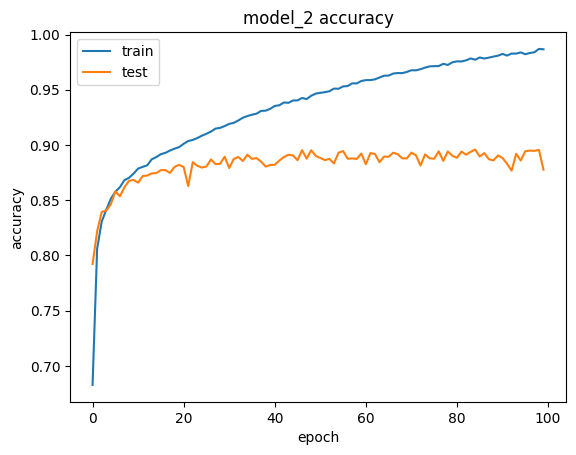

In [ ]:
plt.plot(training_2.history['accuracy'])
plt.plot(training_2.history['val_accuracy'])
plt.title('model_2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

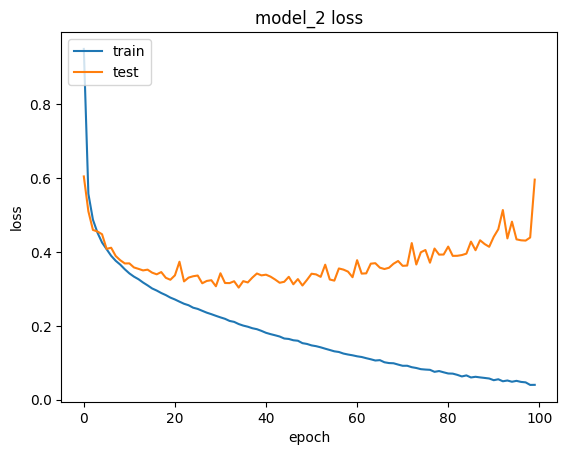

In [ ]:
plt.plot(training_2.history['loss'])
plt.plot(training_2.history['val_loss'])
plt.title('model_2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc = model_2.evaluate(x_test,y_test)
print("Test Accuracy model_2: ",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.6804 - accuracy: 0.8689
Test Accuracy model_2:  0.8689000010490417


Model 3 : Adding Dropout

In [ ]:
model_3 = tf.keras.Sequential()
N_hidden = 128

model_3.add(Dense(N_hidden,name = 'dense_layer_111',input_shape = (784,),activation = 'relu'))
model_3.add(Dropout(0.3))

model_3.add(Dense(N_hidden,name = 'dense_layer_222',activation = 'relu'))
model_3.add(Dropout(0.3))

model_3.add(Dense(10,name = 'dense_layer_333',activation = 'softmax'))



In [ ]:
model_3.compile(optimizer = 'SGD',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
training_3 = model_3.fit(x_train,y_train,batch_size = 64,epochs = 70,validation_split = 0.2)

Epoch 1/70
750/750 [==============================] - 4s 4ms/step - loss: 1.2680 - accuracy: 0.5546 - val_loss: 0.7398 - val_accuracy: 0.7385
Epoch 2/70
750/750 [==============================] - 3s 4ms/step - loss: 0.8030 - accuracy: 0.7121 - val_loss: 0.6108 - val_accuracy: 0.7867
Epoch 3/70
750/750 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.7591 - val_loss: 0.5441 - val_accuracy: 0.8111
Epoch 4/70
750/750 [==============================] - 4s 5ms/step - loss: 0.6213 - accuracy: 0.7826 - val_loss: 0.5092 - val_accuracy: 0.8223
Epoch 5/70
750/750 [==============================] - 3s 4ms/step - loss: 0.5823 - accuracy: 0.7980 - val_loss: 0.4836 - val_accuracy: 0.8286
Epoch 6/70
750/750 [==============================] - 3s 4ms/step - loss: 0.5518 - accuracy: 0.8073 - val_loss: 0.4629 - val_accuracy: 0.8367
Epoch 7/70
750/750 [==============================] - 3s 4ms/step - loss: 0.5275 - accuracy: 0.8163 - val_loss: 0.4471 - val_accuracy: 0.8408
Epoch 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training_3.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


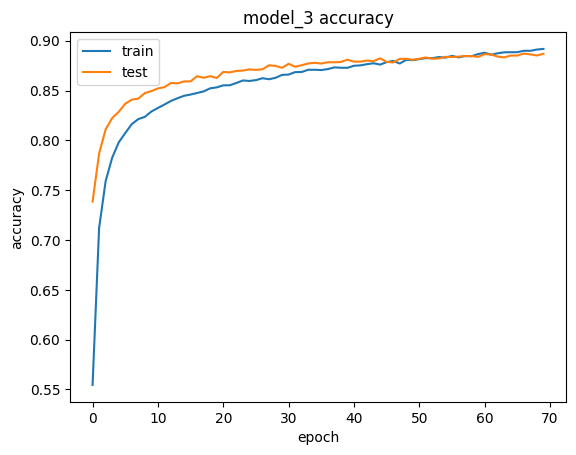

In [ ]:
plt.plot(training_3.history['accuracy'])
plt.plot(training_3.history['val_accuracy'])
plt.title('model_3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

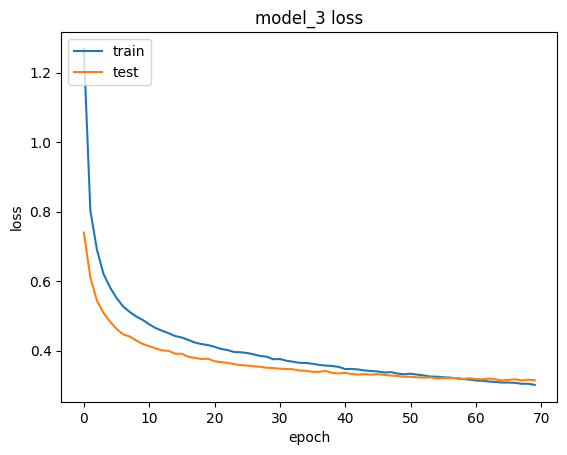

In [ ]:
plt.plot(training_3.history['loss'])
plt.plot(training_3.history['val_loss'])
plt.title('model_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc = model_3.evaluate(x_test,y_test)
print("Test Accuracy model_3: ",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8782
Test Accuracy model_3:  0.8781999945640564


In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_111 (Dense)     (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_222 (Dense)     (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_333 (Dense)     (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 4 : Changing Dropout(Increasing it)

In [ ]:
model_4 = tf.keras.Sequential()
N_hidden = 128

model_4.add(Dense(N_hidden,name = 'dense_layer_1111',input_shape = (784,),activation = 'relu'))
model_4.add(Dropout(0.4))

model_4.add(Dense(N_hidden,name = 'dense_layer_2222',activation = 'relu'))
model_4.add(Dropout(0.4))

model_4.add(Dense(10,name = 'dense_layer_3333',activation = 'softmax'))



In [ ]:
model_4.compile(optimizer = 'SGD',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
training_4 = model_4.fit(x_train,y_train,batch_size = 64,epochs = 70,validation_split = 0.2)

Epoch 1/70
750/750 [==============================] - 4s 4ms/step - loss: 1.3393 - accuracy: 0.5312 - val_loss: 0.7582 - val_accuracy: 0.7337
Epoch 2/70
750/750 [==============================] - 4s 5ms/step - loss: 0.8643 - accuracy: 0.6933 - val_loss: 0.6265 - val_accuracy: 0.7805
Epoch 3/70
750/750 [==============================] - 4s 5ms/step - loss: 0.7396 - accuracy: 0.7410 - val_loss: 0.5657 - val_accuracy: 0.7973
Epoch 4/70
750/750 [==============================] - 5s 6ms/step - loss: 0.6707 - accuracy: 0.7628 - val_loss: 0.5226 - val_accuracy: 0.8168
Epoch 5/70
750/750 [==============================] - 5s 6ms/step - loss: 0.6242 - accuracy: 0.7821 - val_loss: 0.4949 - val_accuracy: 0.8247
Epoch 6/70
750/750 [==============================] - 3s 5ms/step - loss: 0.5910 - accuracy: 0.7926 - val_loss: 0.4768 - val_accuracy: 0.8289
Epoch 7/70
750/750 [==============================] - 3s 4ms/step - loss: 0.5654 - accuracy: 0.8028 - val_loss: 0.4620 - val_accuracy: 0.8330
Epoch 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training_4.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


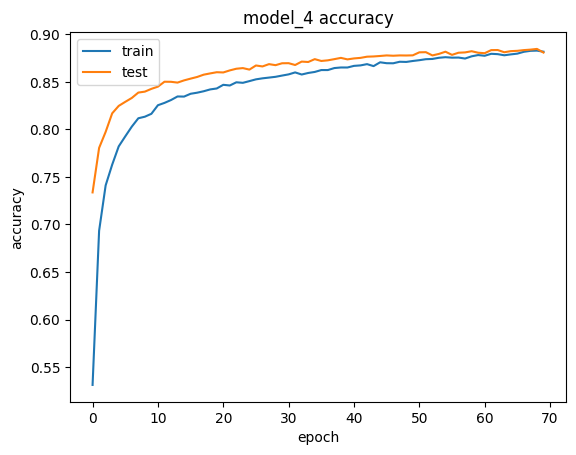

In [ ]:
plt.plot(training_4.history['accuracy'])
plt.plot(training_4.history['val_accuracy'])
plt.title('model_4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

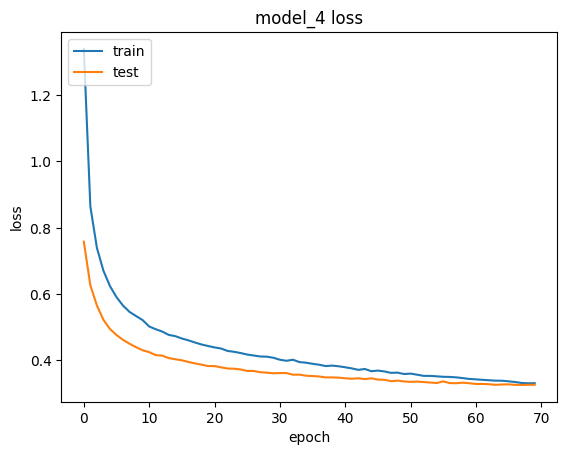

In [ ]:
plt.plot(training_4.history['loss'])
plt.plot(training_4.history['val_loss'])
plt.title('model_4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc = model_4.evaluate(x_test,y_test)
print("Test Accuracy model_4: ",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3507 - accuracy: 0.8731
Test Accuracy model_4:  0.8730999827384949


In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1111 (Dense)    (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_2222 (Dense)    (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3333 (Dense)    (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 5 : Change the Optimizer

In [ ]:

model_5 = tf.keras.Sequential()
N_hidden = 64

model_5.add(Dense(N_hidden,name = 'dense_layer_11111',input_shape = (784,),activation = 'relu'))
model_5.add(Dropout(0.3))

model_5.add(Dense(N_hidden,name = 'dense_layer_22222',activation = 'relu'))
model_5.add(Dropout(0.3))

model_5.add(Dense(10,name = 'dense_layer_33333',activation = 'softmax'))


In [ ]:
model_5.compile(optimizer = 'Adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
training_5 = model_5.fit(x_train,y_train,batch_size = 128,epochs = 70,validation_split = 0.2)

Epoch 1/70
375/375 [==============================] - 2s 5ms/step - loss: 0.8670 - accuracy: 0.6870 - val_loss: 0.4863 - val_accuracy: 0.8237
Epoch 2/70
375/375 [==============================] - 1s 4ms/step - loss: 0.5513 - accuracy: 0.8062 - val_loss: 0.4325 - val_accuracy: 0.8422
Epoch 3/70
375/375 [==============================] - 2s 4ms/step - loss: 0.4938 - accuracy: 0.8265 - val_loss: 0.4074 - val_accuracy: 0.8530
Epoch 4/70
375/375 [==============================] - 1s 4ms/step - loss: 0.4582 - accuracy: 0.8389 - val_loss: 0.3891 - val_accuracy: 0.8549
Epoch 5/70
375/375 [==============================] - 2s 5ms/step - loss: 0.4407 - accuracy: 0.8430 - val_loss: 0.3829 - val_accuracy: 0.8585
Epoch 6/70
375/375 [==============================] - 3s 9ms/step - loss: 0.4245 - accuracy: 0.8487 - val_loss: 0.3680 - val_accuracy: 0.8648
Epoch 7/70
375/375 [==============================] - 2s 6ms/step - loss: 0.4104 - accuracy: 0.8547 - val_loss: 0.3572 - val_accuracy: 0.8714
Epoch 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training_5.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


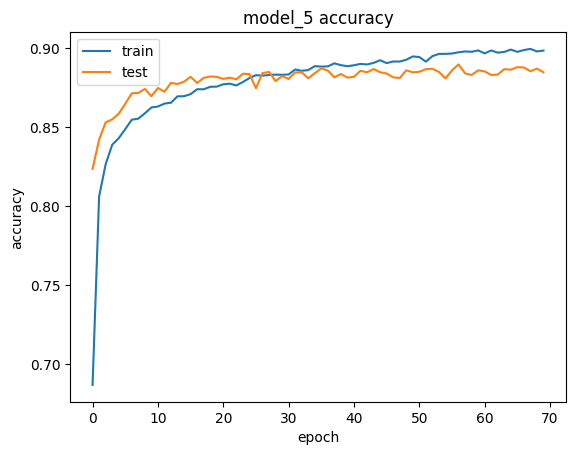

In [ ]:
plt.plot(training_5.history['accuracy'])
plt.plot(training_5.history['val_accuracy'])
plt.title('model_5 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

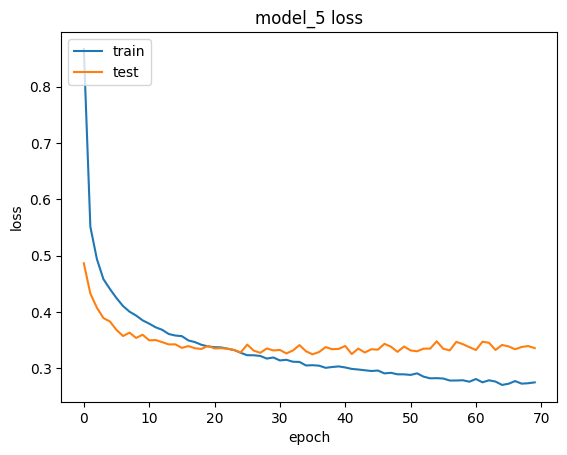

In [ ]:
plt.plot(training_5.history['loss'])
plt.plot(training_5.history['val_loss'])
plt.title('model_5 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc = model_5.evaluate(x_test,y_test)
print("Test Accuracy model_5: ",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8795
Test Accuracy model_5:  0.8794999718666077


In [ ]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_11111 (Dense)   (None, 64)                50240     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_layer_22222 (Dense)   (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_layer_33333 (Dense)   (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 6 : Increasing Hidden Layer Neurons

In [ ]:
model_6 = tf.keras.Sequential()
N_hidden = 128

model_6.add(Dense(N_hidden,name = 'dense_layer_111',input_shape = (784,),activation = 'relu'))
model_6.add(Dropout(0.3))

model_6.add(Dense(N_hidden,name = 'dense_layer_2222',activation = 'relu'))
model_6.add(Dropout(0.3))

model_6.add(Dense(10,name = 'dense_layer_3333',activation = 'softmax'))

In [ ]:
model_6.compile(optimizer = 'Adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
training_6 = model_6.fit(x_train,y_train,batch_size = 64,epochs = 100,validation_split = 0.2)

Epoch 1/100
750/750 [==============================] - 5s 5ms/step - loss: 0.6634 - accuracy: 0.7603 - val_loss: 0.4355 - val_accuracy: 0.8416
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4635 - accuracy: 0.8337 - val_loss: 0.3961 - val_accuracy: 0.8538
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4224 - accuracy: 0.8484 - val_loss: 0.3766 - val_accuracy: 0.8635
Epoch 4/100
750/750 [==============================] - 3s 4ms/step - loss: 0.3951 - accuracy: 0.8573 - val_loss: 0.3618 - val_accuracy: 0.8675
Epoch 5/100
750/750 [==============================] - 6s 7ms/step - loss: 0.3817 - accuracy: 0.8586 - val_loss: 0.3610 - val_accuracy: 0.8676
Epoch 6/100
750/750 [==============================] - 5s 6ms/step - loss: 0.3669 - accuracy: 0.8652 - val_loss: 0.3375 - val_accuracy: 0.8783
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.3540 - accuracy: 0.8707 - val_loss: 0.3290 - val_accuracy: 0.8789

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training_6.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


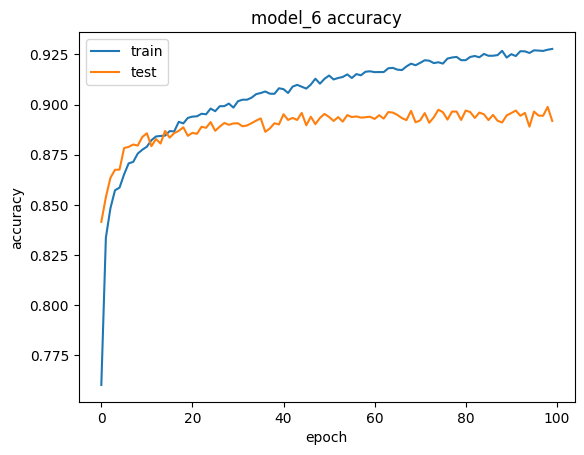

In [ ]:
plt.plot(training_6.history['accuracy'])
plt.plot(training_6.history['val_accuracy'])
plt.title('model_6 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

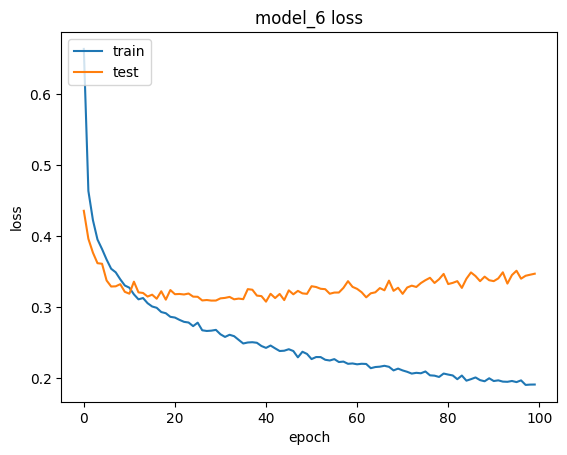

In [ ]:
plt.plot(training_6.history['loss'])
plt.plot(training_6.history['val_loss'])
plt.title('model_6 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc = model_6.evaluate(x_test,y_test)
print("Test Accuracy: ",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3788 - accuracy: 0.8864
Test Accuracy:  0.8863999843597412


In [ ]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_111 (Dense)     (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_2222 (Dense)    (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3333 (Dense)    (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 7 : Changing Batch Size

In [ ]:
model_7 = tf.keras.Sequential()
N_hidden = 512

model_7.add(Dense(N_hidden,name = 'dense_layer_1111111',input_shape = (784,),activation = 'relu'))
model_7.add(Dropout(0.3))

model_7.add(Dense(N_hidden,name = 'dense_layer_2222222',activation = 'relu'))
model_7.add(Dropout(0.3))

model_7.add(Dense(10,name = 'dense_layer_3333333',activation = 'softmax'))

In [ ]:
model_7.compile(optimizer = 'Adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
training_7 = model_7.fit(x_train,y_train,batch_size = 128,epochs = 100,validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 9s 21ms/step - loss: 0.5638 - accuracy: 0.7969 - val_loss: 0.4003 - val_accuracy: 0.8533
Epoch 2/100
375/375 [==============================] - 7s 17ms/step - loss: 0.4142 - accuracy: 0.8500 - val_loss: 0.3729 - val_accuracy: 0.8658
Epoch 3/100
375/375 [==============================] - 8s 22ms/step - loss: 0.3775 - accuracy: 0.8606 - val_loss: 0.3498 - val_accuracy: 0.8742
Epoch 4/100
375/375 [==============================] - 8s 22ms/step - loss: 0.3559 - accuracy: 0.8680 - val_loss: 0.3665 - val_accuracy: 0.8644
Epoch 5/100
375/375 [==============================] - 7s 20ms/step - loss: 0.3390 - accuracy: 0.8733 - val_loss: 0.3287 - val_accuracy: 0.8819
Epoch 6/100
375/375 [==============================] - 10s 27ms/step - loss: 0.3210 - accuracy: 0.8815 - val_loss: 0.3357 - val_accuracy: 0.8792
Epoch 7/100
375/375 [==============================] - 7s 18ms/step - loss: 0.3123 - accuracy: 0.8841 - val_loss: 0.3124 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training_7.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


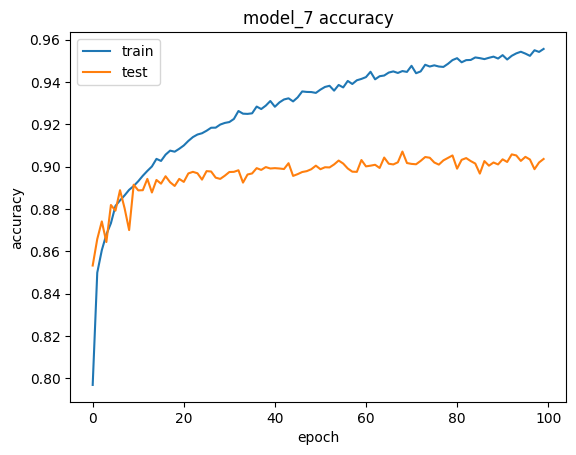

In [ ]:
plt.plot(training_7.history['accuracy'])
plt.plot(training_7.history['val_accuracy'])
plt.title('model_7 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

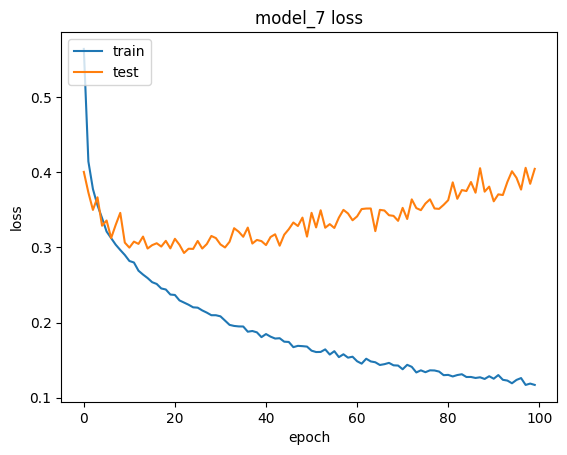

In [ ]:
plt.plot(training_7.history['loss'])
plt.plot(training_7.history['val_loss'])
plt.title('model_7 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc = model_7.evaluate(x_test,y_test)
print("Test Accuracy: ",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4315 - accuracy: 0.9002
Test Accuracy:  0.9002000093460083


In [ ]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1111111 (Dense  (None, 512)               401920    
 )                                                               
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_2222222 (Dense  (None, 512)               262656    
 )                                                               
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_3333333 (Dense  (None, 10)                5130      
 )                                                               
                                                      

Model 7 gives the highest test accuracy so lets make predictions on the same

Predictions :

In [ ]:
import numpy as np

# Assuming test_images is your test data
# Make sure test_images is properly preprocessed (e.g., scaled to [0, 1])

# Predictions
predictions = model_7.predict(x_test)

# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted classes
print("Predicted classes:", predicted_classes)


313/313 [==============================] - 2s 5ms/step
Predicted classes: [9 2 1 ... 8 1 5]
